In [8]:
## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# -- Project Name: PingAn_SafeDriving (PASD)

# -- File Name: PASD_EDA.ipynb

# -- Function: This notebook is primarily used for exploratory data analysis.

# -- Dataset: PINGAN-2018-train_demo.csv

# -- Revision history: 
# ---- 4/14/18: File generated (Qisen)

## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [7]:
## IMPORTANT: PLEASE UPDATE THE REVISION HISTORY (IN ABOVE SECTION) BEFORE EDITIONS. 

In [2]:
## Import packages

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
## Set plotting styles

plt.style.use('fivethirtyeight')
mpl.style.use('ggplot')
sns.set_style('white')
#pylab.rcParams['figure.figsize'] = 8,6

In [12]:
## Check current working directory

cwd = os.getcwd()
print ('Current directory:', cwd)

Current directory: /home/qisen/Desktop/Research/PingAn-SaveDriving


In [59]:
## Load raw data

raw_data = pd.read_csv("PINGAN-2018-train_demo.csv")
data = raw_data

In [60]:
## Basic information about raw dataset

print ('Shape of dataset: ', data.shape)
print ('Original features: \n', data.columns.values[:-1])
print ('Original label: ', data.columns.values[-1])
print ('Num. of people: ', )
print ('Examples of dataset:')
data.head(5)

Shape of dataset:  (69306, 10)
Original features: 
 ['TERMINALNO' 'TIME' 'TRIP_ID' 'LONGITUDE' 'LATITUDE' 'DIRECTION' 'HEIGHT'
 'SPEED' 'CALLSTATE']
Original label:  Y
Num. of people: 
Examples of dataset:


,TERMINALNO,TIME,TRIP_ID,LONGITUDE,LATITUDE,DIRECTION,HEIGHT,SPEED,CALLSTATE,Y
0,1,1476923580,1,122.985168,41.103741,12,39.402588,2.15,0,0.0
1,1,1476923640,1,122.984398,41.104904,24,39.311157,4.11,0,0.0
2,1,1476923700,1,122.986496,41.106388,74,34.178955,2.99,0,0.0
3,1,1476923760,1,122.989769,41.106884,115,37.765381,7.59,0,0.0
4,1,1476923820,1,122.991089,41.105442,151,36.049194,0.24,0,0.0


In [15]:
## Check missing data

print ('Missing information: \n', data.isnull().sum())

Missing information: 
 TERMINALNO    0
TIME          0
TRIP_ID       0
LONGITUDE     0
LATITUDE      0
DIRECTION     0
HEIGHT        0
SPEED         0
CALLSTATE     0
Y             0
dtype: int64


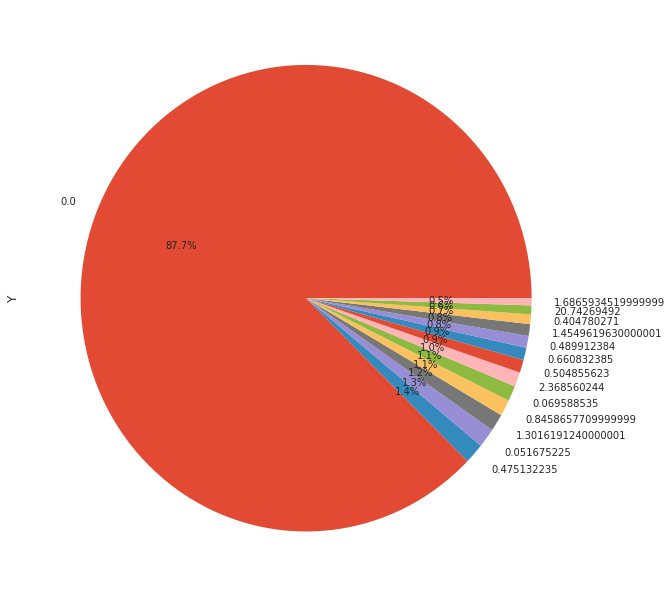

In [29]:
## Class percentages

f1 = plt.figure(figsize = (9, 10))
data['Y'].value_counts().plot.pie(autopct = '%1.1f%%', shadow = False)
# ax1.set_title('Observation percentage of different classes')
# ax1.set_ylabel('')
# sns.countplot('Y', data = data, ax = ax1[1])
# ax1[1].set_title('Observation counts of different classes')

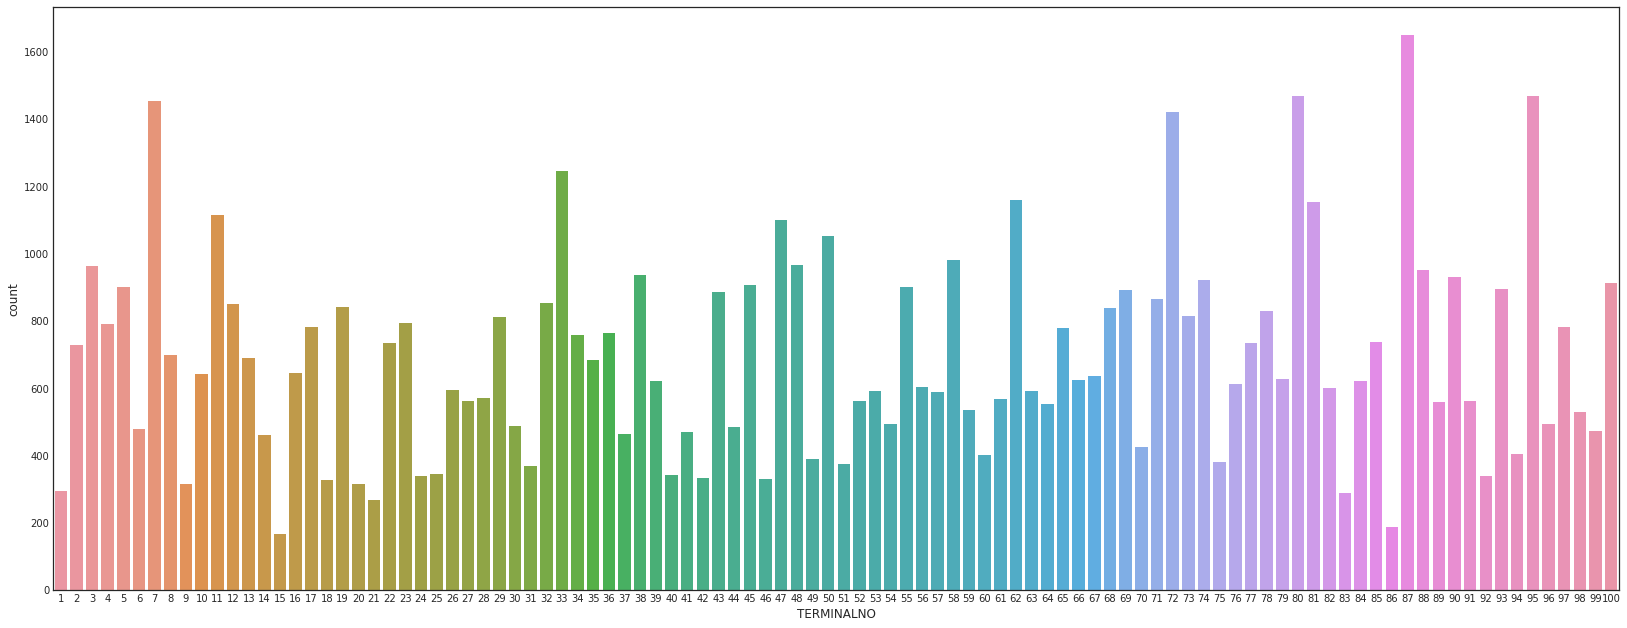

In [44]:
## Observations per people

f2 = plt.figure(figsize = (25, 10))
sns.countplot('TERMINALNO', data = data)

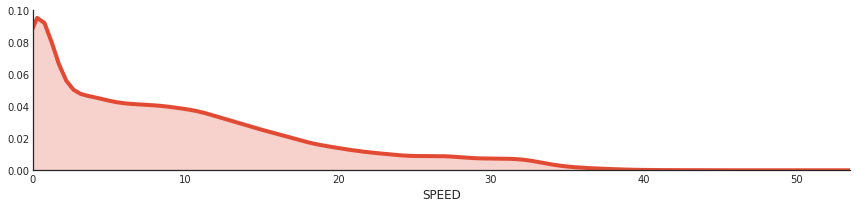

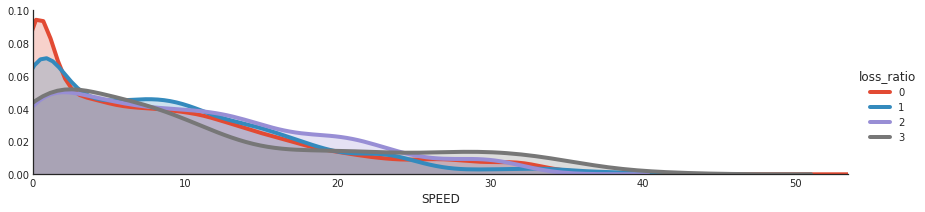

In [69]:
## Distribution of speed

data['loss_ratio'] = 0 # 0: none loss

# Overall distribution
f1 = plt.figure()
facet = sns.FacetGrid(data, hue="loss_ratio",aspect=4)
facet.map(sns.kdeplot,'SPEED',shade= True)
facet.set(xlim=(0, data['SPEED'].max()))
facet.set(ylim=(0, 0.1))

data['loss_ratio'][data['Y'] > 0] = 1 # 1: loss-to-premium ratio is >0 and <1
data['loss_ratio'][data['Y'] > 1] = 2 # 2: loss-to-premium ratio is >1 and <2
data['loss_ratio'][data['Y'] > 2] = 3 # 2: loss-to-premium ratio is >2

# Speed vs. different loss-to-premium ratio
f2 = plt.figure()
facet = sns.FacetGrid(data, hue="loss_ratio",aspect=4)
facet.map(sns.kdeplot,'SPEED',shade= True)
facet.set(xlim=(0, data['SPEED'].max()))
facet.set(ylim=(0, 0.1))
facet.add_legend()

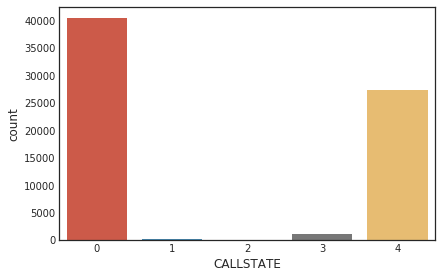

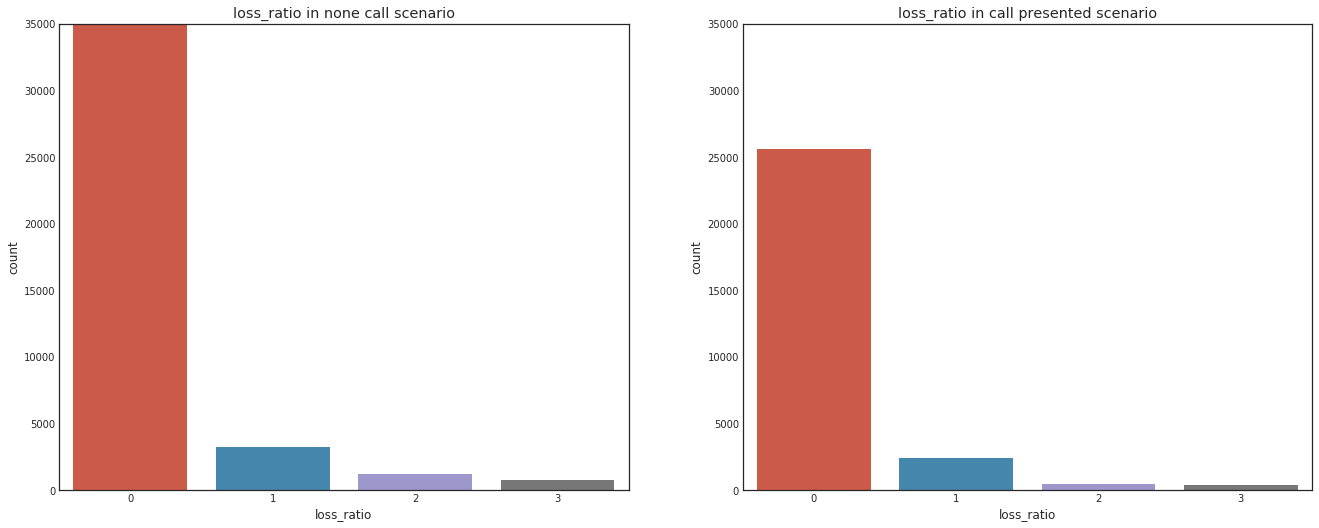

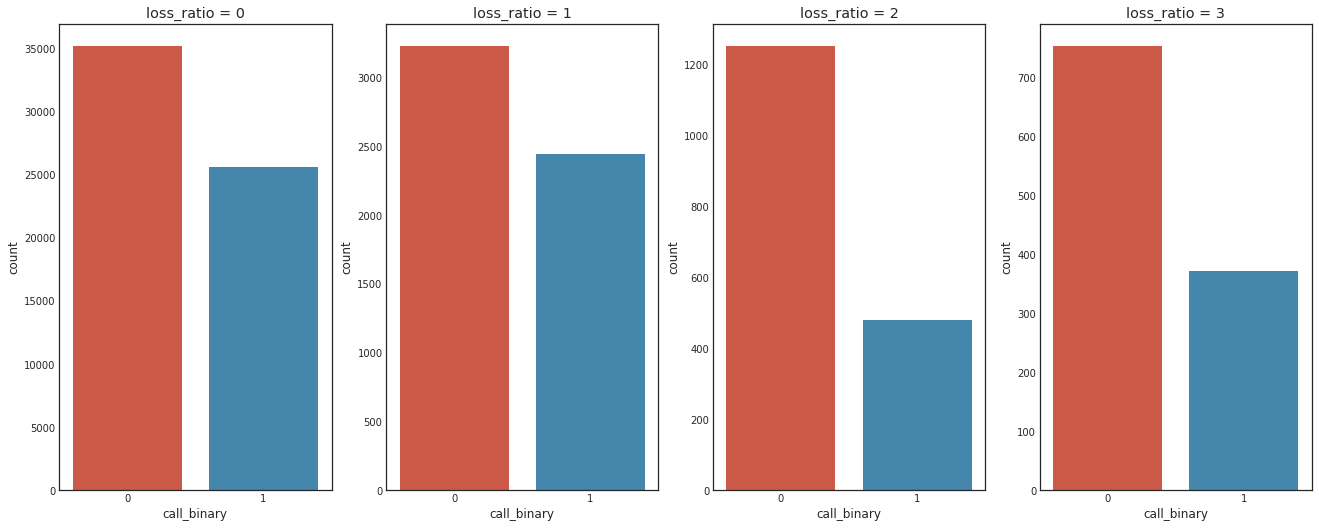

In [93]:
## Distribution of callstate

# Overall distribution -- 0:no_call; 1:out; 2:in; 3:connecting; 4:disconnected 
f1 = plt.figure()
sns.countplot('CALLSTATE', data = data)

data['call_binary'] = 0
data['call_binary'][data['CALLSTATE'] > 0] = 1

# Call state vs. loss-to-premium ratio
f2,ax1 = plt.subplots(1,2,figsize=(20,8))
sns.countplot(data[data['call_binary'] == 0].loss_ratio, ax = ax1[0])
ax1[0].set_title('loss_ratio in none call scenario')
ax1[0].set(ylim=(0, 35000))
sns.countplot(data[data['call_binary'] == 1].loss_ratio, ax = ax1[1])
ax1[1].set_title('loss_ratio in call presented scenario')
ax1[1].set(ylim=(0, 35000))

f3,ax2 = plt.subplots(1,4,figsize=(20,8))
sns.countplot(data[data['loss_ratio'] == 0].call_binary, ax = ax2[0])
ax2[0].set_title('loss_ratio = 0')
# ax2[0].set(ylim=(0, 35000))
sns.countplot(data[data['loss_ratio'] == 1].call_binary, ax = ax2[1])
ax2[1].set_title('loss_ratio = 1')
# ax2[1].set(ylim=(0, 35000))
sns.countplot(data[data['loss_ratio'] == 2].call_binary, ax = ax2[2])
ax2[2].set_title('loss_ratio = 2')
# ax2[1].set(ylim=(0, 35000))
sns.countplot(data[data['loss_ratio'] == 3].call_binary, ax = ax2[3])
ax2[3].set_title('loss_ratio = 3')
# ax2[1].set(ylim=(0, 35000))
plt.show()

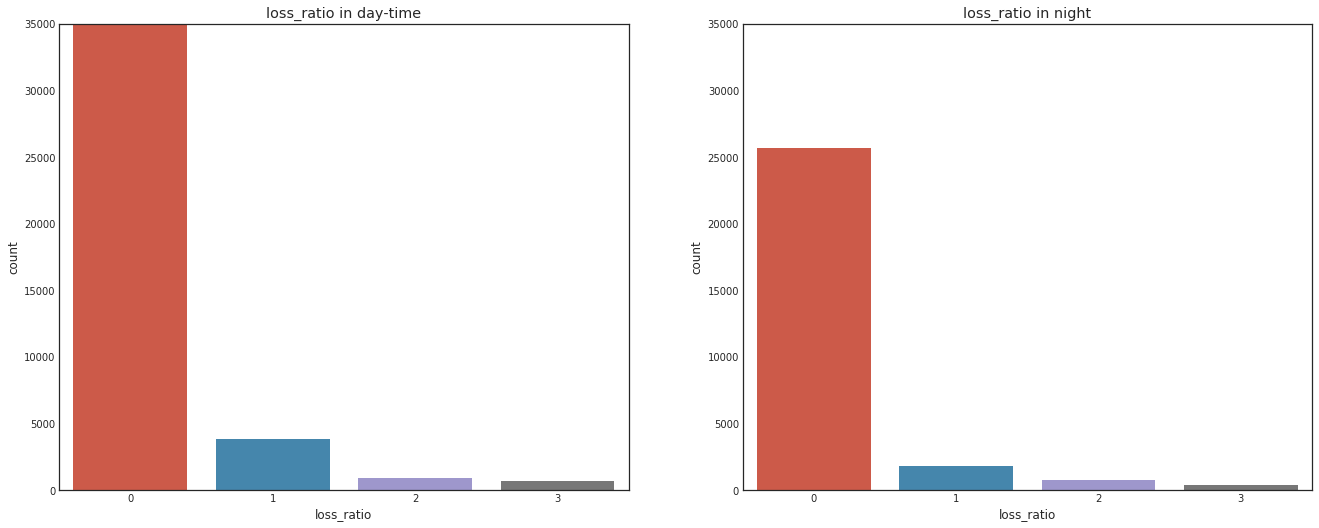

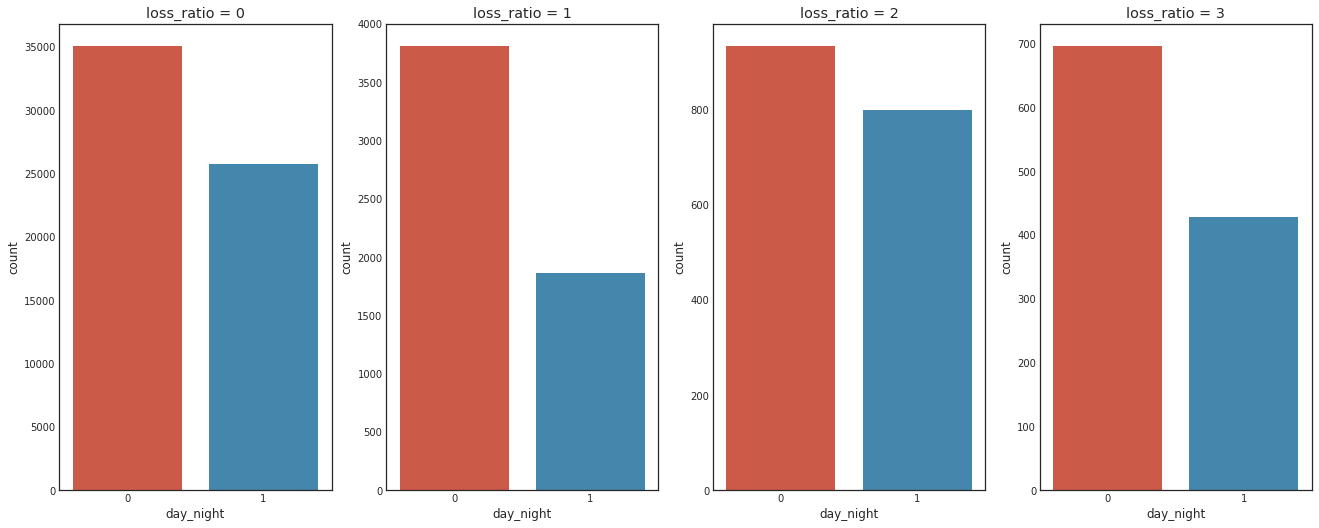

In [96]:
## Distribution of loss-to-premium ratio in day time or at night

data['time'] = data['TIME'] / 3600
# data.head(5)
data['time'] = data['time'] % 24
# data.head(50)
data['day_night'] = 0
data['day_night'][data['time'] < 5] = 1
data['day_night'][data['time'] > 21] = 1
data.drop(['time'], axis=1, inplace=True)
# data.head(50)

# Day_night vs. loss-to-premium ratio
f1,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot(data[data['day_night'] == 0].loss_ratio, ax = ax[0])
ax[0].set_title('loss_ratio in day-time')
ax[0].set(ylim=(0, 35000))
sns.countplot(data[data['day_night'] == 1].loss_ratio, ax = ax[1])
ax[1].set_title('loss_ratio in night')
ax[1].set(ylim=(0, 35000))

f2,ax2 = plt.subplots(1,4,figsize=(20,8))
sns.countplot(data[data['loss_ratio'] == 0].day_night, ax = ax2[0])
ax2[0].set_title('loss_ratio = 0')
# ax2[0].set(ylim=(0, 35000))
sns.countplot(data[data['loss_ratio'] == 1].day_night, ax = ax2[1])
ax2[1].set_title('loss_ratio = 1')
# ax2[1].set(ylim=(0, 35000))
sns.countplot(data[data['loss_ratio'] == 2].day_night, ax = ax2[2])
ax2[2].set_title('loss_ratio = 2')
# ax2[1].set(ylim=(0, 35000))
sns.countplot(data[data['loss_ratio'] == 3].day_night, ax = ax2[3])
ax2[3].set_title('loss_ratio = 3')
# ax2[1].set(ylim=(0, 35000))
plt.show()